<a href="https://colab.research.google.com/github/Prabalshukla18/Real-Time-Stock-Market-Analysis/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.preprocessing import StandardScaler

# Evaluation metrics
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [ ]:
# Load CSV file into DataFrame
car_dataset = pd.read_csv("/content/car data.csv")
print(car_dataset.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [ ]:
car_dataset.shape
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:

# Check distribution for a categorical column
print(car_dataset['Selling_Price'].value_counts(normalize=True))  # proportions
print(car_dataset['Fuel_Type'].value_counts())           # counts


Selling_Price
0.45     0.026578
0.60     0.026578
4.50     0.023256
5.25     0.023256
4.75     0.019934
           ...   
10.11    0.003322
6.40     0.003322
8.55     0.003322
9.50     0.003322
11.50    0.003322
Name: proportion, Length: 156, dtype: float64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [ ]:
# Encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# Encoding "Seller_Type" column
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

# Encoding Transmission
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


/tmp/ipython-input-625538054.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
/tmp/ipython-input-625538054.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
/tmp/ipython-input-625538054.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, Y_train)


LinearRegression()

In [ ]:
data_predict = lin_reg.predict(X_train)

In [ ]:
mean_squared_error = metrics.r2_score(Y_train, data_predict)
print("R squared Error : ", mean_squared_error)

R squared Error :  0.8799451660493711


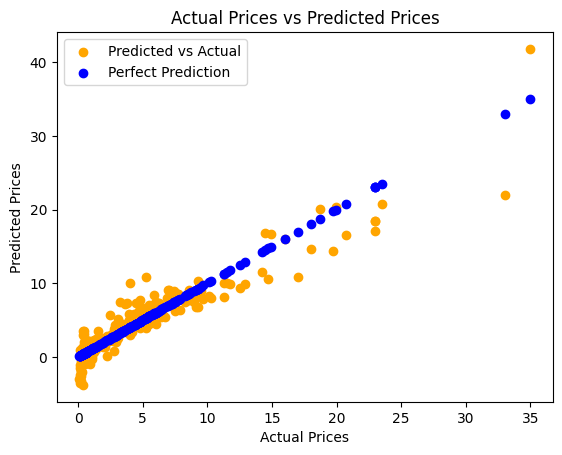

In [ ]:
plt.scatter(Y_train, data_predict, color='orange', label="Predicted vs Actual")
plt.scatter(Y_train, Y_train, color='blue', label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()


In [ ]:
test_data_predict = lin_reg.predict(X_test)

In [ ]:
mean_squared_error1 = metrics.r2_score(Y_test, test_data_predict)
print("R squared Error : ", mean_squared_error1)

R squared Error :  0.8365766715027051


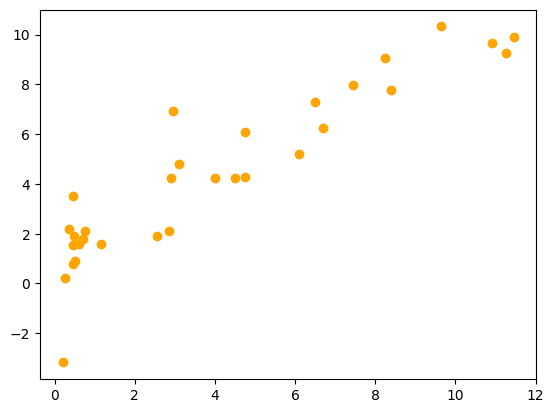

In [ ]:
plt.scatter(Y_test, test_data_predict, color='orange', label="Predicted vs Actual")